In [4]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import time
from scipy.stats import norm

In [2]:
######################
# Auxiliary functions:
######################

def Wiener_proc(N, T):
    W = np.zeros(N)  
    delta = T / N
    sqrt_delta = np.sqrt(delta)    
    for i in range (1, N):
        W[i] += W[i-1] + rnd.normal(0, sqrt_delta)
    return W

# Geometric Brownian Motion process
def GBM(S, mu, sigma, dt):
    dS = mu * S * dt + sigma * S * rnd.normal(0, np.sqrt(dt))
    return dS

# Ornstein-Uhlenbeck process
def OU(S, theta, sigma, dt):
    dS = -theta * S * dt + sigma * rnd.normal(0, np.sqrt(dt))
    return dS

# Cox-Ingersoll-Ross process #theta 3 params
def CIR(S, kappa, theta, sigma, dt):
    dS = (kappa - theta * S) * dt + sigma * np.sqrt(S) * rnd.normal(0, np.sqrt(dt))
    return dS

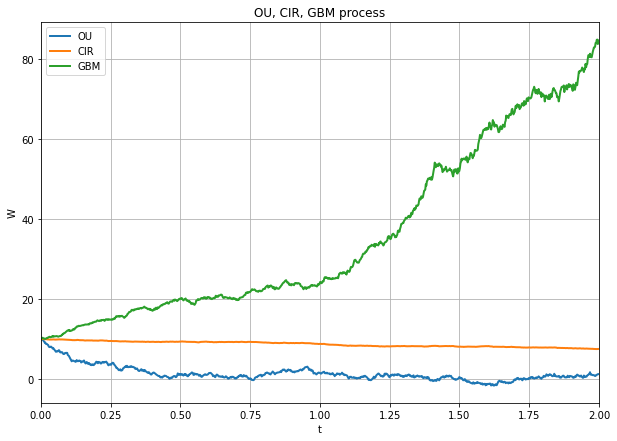

In [117]:
# Task 1
# Use stochastic integral (N=100) to simulate and plot
# a) O-U model with S(0) = 10, theta = 5, sigma = 3.5
# b) the CIR with theta = [2, 0.2, 0.15]
# c) BSM (=GBM) with mu = 1, sigma = 0.2

# Data:
N = 1000
T = 2
time_line, dt = np.linspace(0, T, N, retstep=True)
mu = 1
sigma = 0.2

S_a = np.zeros(N)
S_b = np.zeros(N)
S_c = np.zeros(N)

S_a[0], S_b[0], S_c[0] = 10, 10, 10

for i in range(1, N):
    S_a[i] = S_a[i-1] + OU(S_a[i-1], 5, 3.5, dt)        # theta = 5, sigma = 10
    S_b[i] = S_b[i-1] + CIR(S_b[i-1], 1, 0.2, 0.15, dt) # kappa = 2, theta = 0.2, sigma = 0.15
    S_c[i] = S_c[i-1] + GBM(S_c[i-1], 1, 0.2, dt)       # mu = 1, sigma = 0.2
    
# Plot figure
plt.figure ( figsize =(10, 7) )
plt.grid ()
plt.plot (time_line, S_a, linewidth =2.0, label="OU")
plt.plot (time_line, S_b, linewidth =2.0, label="CIR")
plt.plot (time_line, S_c, linewidth =2.0, label="GBM")
plt.title ("OU, CIR, GBM process")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(0, T)
plt.show ()

In [3]:
# Task 2
# Compute a confidence interval of the CIR process

######################
# Auxiliary functions:
######################

# K-parameter - degrees of freedom
def K_degrees(alpha, sigma):
    return 4 * alpha / (sigma ** 2)

def Dzeta(sigma, beta, tau):
    return (sigma ** 2) * (1 - np.exp(-beta * tau)) / (4 * beta)

# Non-centrality parameter
def Lambda(sigma, beta, tau, S):
    return 4 * beta * np.exp(-beta * tau) * S / ((sigma ** 2) * (1 - np.exp(-beta * tau)))

# Confidence interval
def Confidence_int(d, k, l, alpha):
    v_l = d * (k + l - norm.ppf(1 - alpha / 2) * np.sqrt(2 * (k + 2 * l)))
    v_u = d * (k + l + norm.ppf(1 - alpha / 2) * np.sqrt(2 * (k + 2 * l)))
    return v_l, v_u

In [105]:
c_u[0]

0.0

5.676082834370314e-05 175822.2820800604 9.906656685257184 10.093343314742816
0.00011340710409596872 87822.34193786496 9.86812575725058 10.13187424274942
0.0001699390584425704 58489.06846229154 9.838650484520558 10.16134951547944
0.00022635692210271446 43822.461653311955 9.813877281787304 10.1861227182127
0.0002826609253299764 35022.52151090161 9.792117925992502 10.207882074007498
0.00033885129791325037 29155.914701701975 9.772505653960854 10.227494346039142
0.00039492826917767034 24965.49836854629 9.754525015557816 10.245474984442184
0.0004508920679855591 21822.70108283861 9.737839806517885 10.262160193482114
0.0005067429227373528 19378.316495348343 9.722216247900239 10.277783752099761
0.0005624810613725467 17422.820796527034 9.707483943426606 10.292516056573392
0.0006181067113706105 15822.880653017017 9.693514118639387 10.306485881360615
0.0006736200997519248 14489.607175904974 9.680206619992022 10.319793380007974
0.0007290214530787087 13361.461903627982 9.667481713767657 10.332518286

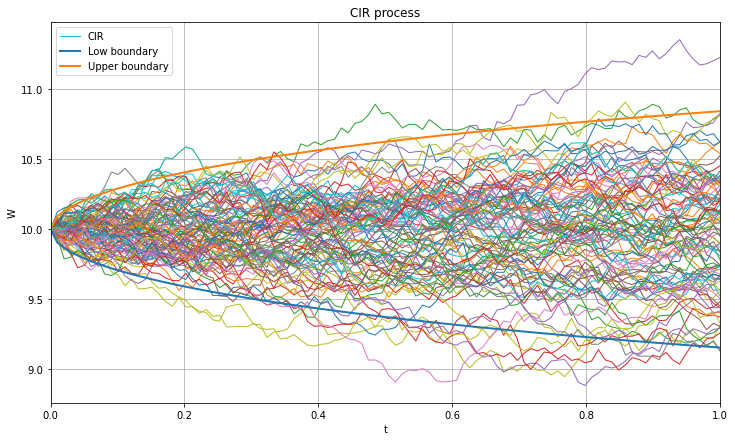

In [4]:
# Data:
N = 100
T = 1
time_line, dt = np.linspace(0, T, N, retstep=True)
mu = 1
sigma = 0.15
kappa = 2
theta = 0.2
alpha = 0.05

k = K_degrees(kappa, sigma)
S_b = np.zeros(N)
c_l, c_u = np.zeros(N), np.zeros(N)

S_b[0] = 10
c_u[0], c_l[0] = S_b[0], S_b[0]

for i in range(1, N):
    d = Dzeta(sigma, theta, time_line[i])
    l = Lambda(sigma, theta, time_line[i], S_b[0])
    c_l[i], c_u[i] = Confidence_int(d, k, l, alpha)
    print(d, l, c_l[i], c_u[i])
    
# Plot figure
plt.figure ( figsize =(12, 7) )
plt.grid ()

for i in range(1, 100):
    for j in range(1, N):
        S_b[j] = S_b[j-1] + CIR(S_b[j-1], kappa, theta, sigma, dt) # kappa = 2, theta = 0.2, sigma = 0.15
    plt.plot (time_line, S_b, linewidth = 1.0)
    
plt.plot (time_line, S_b, linewidth =1.0, label="CIR")
plt.plot (time_line, c_l, linewidth =2.0, label="Low boundary")
plt.plot (time_line, c_u, linewidth =2.0, label="Upper boundary")
plt.title ("CIR process")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(0, T)
plt.show ()

In [19]:
# Task 3
# For OU process generate 3 paths with S0 = 0, 2, N(mu, sigma/2theta)

# Modified Ornstein-Uhlenbeck process for task 3
def M_OU(S, mu, theta, sigma, dt):
    dS = theta * (mu - S) * dt + sigma * rnd.normal(0, np.sqrt(dt))
    return dS

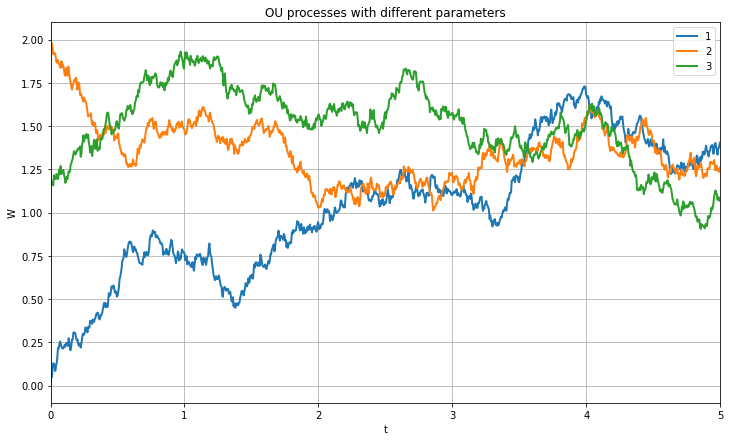

In [124]:
# Data:
N = 1000
T = 5
time_line, dt = np.linspace(0, T, N, retstep=True)
mu    = 1.2
sigma = 0.3
theta = 1

S_a = np.zeros(N)
S_b = np.zeros(N)
S_c = np.zeros(N)
S_a[0], S_b[0], S_c[0] = 0, 2, rnd.normal(mu, (sigma**2)/(theta*2))

for i in range(1, N):
    S_a[i] = S_a[i-1] + M_OU(S_a[i-1], mu, theta, sigma, dt)
    S_b[i] = S_b[i-1] + M_OU(S_b[i-1], mu, theta, sigma, dt)
    S_c[i] = S_c[i-1] + M_OU(S_c[i-1], mu, theta, sigma, dt)
    
# Plot figure
plt.figure ( figsize =(12, 7) )
plt.grid ()
plt.plot (time_line, S_a, linewidth =2.0, label="1")
plt.plot (time_line, S_b, linewidth =2.0, label="2")
plt.plot (time_line, S_c, linewidth =2.0, label="3")
plt.title ("OU processes with different parameters")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(0, T)
plt.show ()

In [139]:
# Task 4
# Generate a mean-revetive process that stays in interval [0, 1]
# and mean-reverts around 0.5

# Designed mean-reversion process
def MR(S, mu, kappa, sigma, dt):
    dS = (kappa - mu * S) * dt + sigma * S * rnd.normal(0, np.sqrt(dt))
    return dS

def MR1(S, mu, kappa, sigma, dt):
    dS = mu * (kappa - S) * dt + S * (1 - S) * rnd.normal(0, np.sqrt(dt))
    return dS

In [56]:
MR(100, mu, kappa, sigma, dt)

-1.8381616524824989

Mean = 0.46595931870343493
Max = 0.8705027459386846
Min = 0.12407753313310751


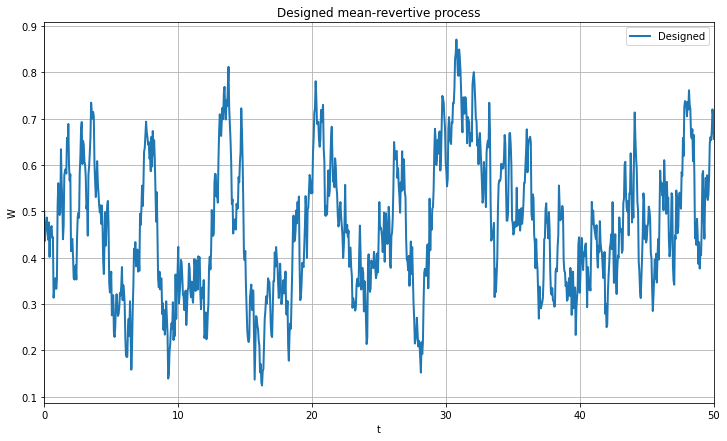

In [140]:
# Data:
N = 1000
T = 50
time_line, dt = np.linspace(0, T, N, retstep=True)

mu    = 1.2
kappa = 0.5 # mean-reversion rate
sigma = 0.3
theta = 1

S_a = np.zeros(N)
S_a[0] = 0.5

for i in range(1, N):
    S_a[i] = S_a[i-1] + MR1(S_a[i-1], mu, kappa, sigma, dt)
    
print("Mean =", S_a.mean())
print("Max =", max(S_a))
print("Min =", min(S_a))

# Plot figure
plt.figure ( figsize =(12, 7) )
plt.grid ()
plt.plot (time_line, S_a, linewidth =2.0, label="Designed")
plt.title ("Designed mean-revertive process")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(0, T)
plt.show ()

In [1]:
# Task 5: find half-time to mean-reversion in OU
# dS = th*(mu - S)dt + sig*dW
import statsmodels.api as sm

In [11]:
# Auxiliary functions:
def Mean_reversion_time(theta, mu, sigma, S, T, N):
    time_line, dt = np.linspace(0, T, N)
    X    = np.zeros(N)
    X[0] = mu
    X_half = np.zeros(N)
    for i in range(1, N):
        X[i] = X[i-1] + M_OU(X[i-1], mu, theta, sigma, dt)
        
    z_lag    = np.roll(X, 1)
    z_lag[0] = 0
    z_ret    = X - z_lag
    z_ret[0] = 0
    print(z_ret)
    
    z_lag2 = sm.OLS(z_ret, z_lag2)
    res    = model.fit()
    half_time = (-np.log(2) / res.params[1])
    return X, np.floor(half_time), half_time

In [2]:
def half_mean_reversed(alpha, mu, N, x0):
    t = np.linspace(0, T, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    x_half = np.zeros(N + 1)
    for it in range(1, N + 1): 
        dxt = alpha * (mu - x[it-1]) * dt + sigma * np.random.normal(0, np.sqrt(dt))
        x[it] = x[it - 1] + dxt
    
    z_lag = np.roll(x, 1)
    z_lag[0] = 0
    z_ret = x - z_lag
    z_ret[0] = 0
    print(z_ret)
    #adds intercept terms to X variable for regression
    z_lag2 = sm.add_constant(z_lag)
    model = sm.OLS(z_ret,z_lag2)
    res = model.fit()
    halflife = (- np.log(2) / res.params[1] ) / 365 * T
    return x, np.floor(halflife), halflife

[ 0.         -0.19968155  0.33986805 ...  0.07292583 -0.04112265
 -0.06210651]
1.0 1.9480056906420118


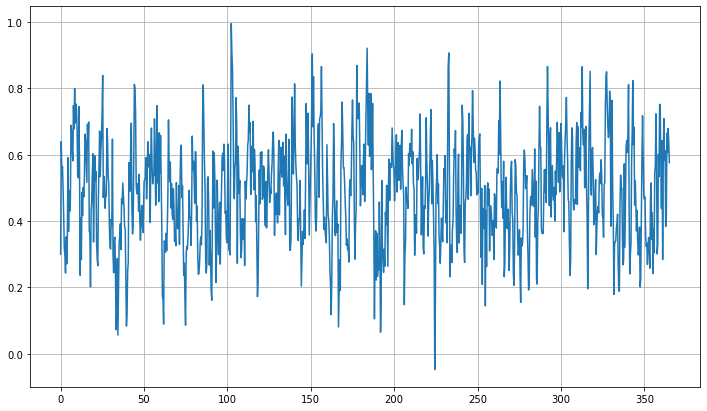

In [15]:
mu    = 0.5
theta = 0.6
sigma = 0.2
t, dt = np.linspace(0, T, N, retstep=True)
S     = 10
N = 1000

x, half_time, d = half_mean_reversed(1, 1/2, N, S)

plt.figure ( figsize =(12, 7) )
plt.plot(t, x[1:])
print(half_time, d)
plt.grid()